# Build Your Own Coding Homework ***ANSWERS***

#### *Note that this coding homework was intentionally not giving students specific functions to give them the experience of testing things out and struggling to figure out what will or will not work. This and the fact that the data has a lot of holes means students may end up approaching solutions in different ways. My personal solution for a lot of things related to averaging the entries each year, but there are plenty of good reasons to approach this in a very different way if students come up with different (valid) solutions.*

## Kylie Miller - Spring 2025

For this assignment, you will be using the "farmworkers_1942_1975.csv" file.

**Here is some context related to the Bracero Program, the topic surrounding the data collected for this file:**

In the wake of World War II, people in the United States suddenly had an abundance of employment opportunities. With men joining the military to fight overseas and the creation of many new industrial jobs to support the war effort, the United States workforce was facing an unusual problem of not having enough workers, particularly in agriculture. The United States government found a willing partner to address this problem in the Mexican government, which was eager to boost its economy by providing work for its unemployed citizens. These simultaneous desires led to an agreement between the two nations that would become known as the Bracero Program, lasting from 1942 until its termination long after the end of World War II in 1964.

The Bracero Program - a term that comes from the Spanish word "brazo" meaning "arm" in reference to manual labor - was a temporary work program that would bring Mexican men to the United States under work contracts for periods between six weeks and six months before returning back to Mexico. After going through a screening and documentation process with the Mexican government, the United States would provide transportation, temporary housing, and food for the Bracero workers in addition to their temporary jobs. By 1964, the United States government ended the Bracero Program, partly because people in the United States worried about the impact of Braceros on domestic labor. Throughout the program, there were also concerns about increased unauthorized immigration from Mexico because it was often easier for both the Mexican workers and farm owners, as Mexican workers did not have to go through the tedious process of screening and documentation (that often required bribes) and farm owners  did not have to provide the required housing, food, and transportation for workers not under Bracero contracts.

**To start off, I want you to explore the contents of the dataset. Think about what columns exist, what they might mean, how the data might have been collected, etc.**

In [255]:
## need to import and read file

import pandas as pd
farmworkers_df = pd.read_csv('farmworkers_1942_1975.csv')

farmworkers_df.sample(10)
##they may choose to explore in more and other ways, which is fine

,State,Year,Month,Region,TotalHiredSeasonal,Mexican,HiredWorkers,Local,Intrastate,Interstate,TotalForeign
3434,IL,1947,8.0,3.0,NaN,1014.0,NaN,NaN,NaN,NaN,1158.0
14900,WV,1965,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,ID,1960,7.0,8.0,10310.0,0.0,181000.0,6575.0,270.0,3465.0,0.0
5758,MD,1949,9.0,5.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
14773,WA,1970,5.0,9.0,17809.0,NaN,NaN,12193.0,1047.0,4569.0,0.0
11099,OK,1960,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7608,MO,1943,11.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8736,NH,1963,10.0,1.0,1300.0,0.0,75000.0,994.0,0.0,124.0,182.0
2726,GA,1967,7.0,5.0,25139.0,NaN,362000.0,25139.0,0.0,0.0,0.0
2744,GA,1969,4.0,5.0,NaN,NaN,178000.0,NaN,NaN,NaN,NaN


Below, write a short response including what you noticed as well as what questions you have about the data.

**This answer will vary widely. Some potential answers include questions about what each column means, noticings about the significant number of "NaN" entries, thoughts about how data was collected regarding months, etc.**

Here is some context related to some of the columns in this file. This information comes from the creator of this dataset, and while it still leaves questions, it can help further clarify the data:
- 'TotalHiredSeasonal' = "Total Hired Seasonal Workers (Local+Intra+Inter+Foreign, 1953-1973)"
- 'Mexican' = "Mexican (contract workers only, 1943-1967)" *(this means that this only counts Mexican workers with contracts through the Bracero Program, not any unauthorized workers)*
- 'HiredWorkers' = "Hired Workers on Farms (total, quarterly 1942-1974)"
- 'Local' = "Local (nonmigratory domestic, 1948-1973)"
- 'Intrastate' = "Intrastate (1948-1973)"
- 'Interstate = "Interstate (1948-1973)"
- 'TotalForeign' = "Total Foreign Workers (as reported, 1945-1948, 1950-1973)"

### Analysis Questions

#### Part 1: Bracero Worker Analysis

**1. Which were the top five states that had the most contracted Bracero workers between 1943 and 1967?**

In [142]:
farmworkers_df.groupby('State')['Mexican'].sum().sort_values(ascending = False)[:5]

State
CA    6309812.0
TX    4192340.0
AZ     991847.0
AR     680217.0
NM     569362.0
Name: Mexican, dtype: float64

**2. According to this data, which states received Bracero workers through the Bracero Program?**

In [257]:
## students should filter out data that had NaN entries or 0.0

bracero_df = farmworkers_df[farmworkers_df['Mexican'].notna()]
bracero_df = bracero_df[bracero_df['Mexican'] > 0.0]
bracero_df['State'].value_counts()

State
CA    235
AZ    205
CO    127
MI    115
UT    112
NM    111
NV    102
WY    101
WI    100
TX     98
NE     96
AR     92
MN     87
OR     85
MT     84
WA     84
IN     82
KS     80
ID     75
IL     71
SD     66
IA     45
TN     38
ND     35
MO     22
KY     22
GA     19
OH     12
LA      7
NY      3
NC      3
DE      2
NH      1
Name: count, dtype: int64

**3. Create a graph that shows the changes in the number of Bracero workers over time.**
*THINGS TO KEEP IN MIND:*
- Many rows have 'NaN' data in the Mexican column.
- Remember to look at the year constraints of the 'Mexican' column.
- You should show these changes referring to *yearly* numbers. Data was collected in specific months, and years often had data collected over many months. However, not all states collected data for the same amount of months. *How will you make sure to represent yearly data without over or under respresenting certain states?*
- You should be able to see each state individually in your final graph through different colors.

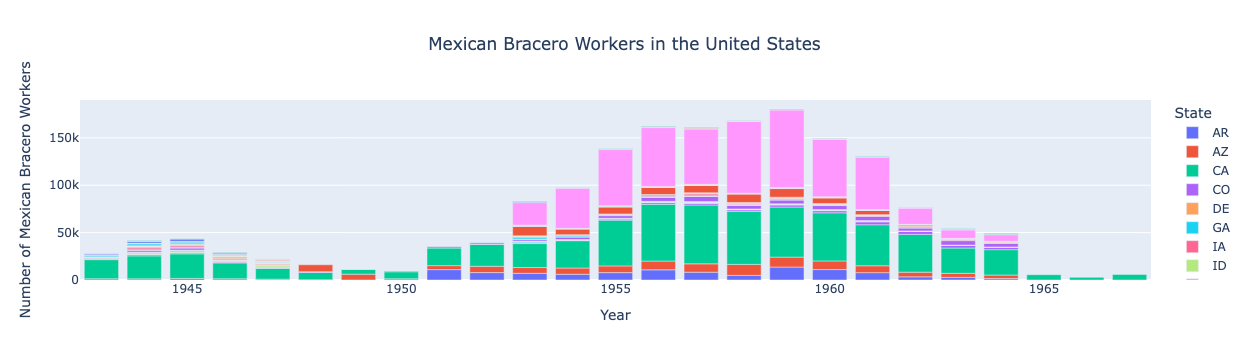

In [259]:
## note that this is INTENTIONALLY not giving hints, functions, etc. so that people can struggle through it. there may be many valid solutions.

#they should use the bracero_df from before because it already filtered out NaN and 0 values
braceros_by_year = bracero_df.groupby(['State', 'Year'])['Mexican'].mean().reset_index()

import plotly.express as px

bracerofig = px.bar(braceros_by_year, x='Year', y='Mexican', color='State', title='Mexican Bracero Workers in the United States',
                   labels={'Mexican': 'Number of Mexican Bracero Workers'})
bracerofig.update_layout(title={'x':0.5, 'xanchor': 'center'})

**4. What trends do you notice looking at this graph? Think about what might explain those trends *and* how this graph may reveal inaccuracies within the data and your previous answers.**

***These responses are relatively open ended. They can talk about the trends over time, the decrease starting in 1960, etc. They may also notice the lack of data for places like Texas, and can refer back to the value_counts for determining states to also support the fact that not all states had a similar amount of reporting***

#### Part 2: Foreign Worker Analysis

**1. How many foreign farmworkers were NOT Bracero workers each year?**

*Don't panic if some of your results look weird. This reflects some of the limitations of the data, which you will reflect on in question 4.*

In [263]:
## This part is a clear reflection of the limitations of the data, as it is showing how things are difficult to compare. In this sense, students can either
# apply the average strategy from before or even see what happens with totals. Both show some weird results as far as comparisons go.

#This is the way using averages
foreign_by_year = farmworkers_df.groupby('Year')['TotalForeign'].mean().reset_index()
bracero_by_year = farmworkers_df.groupby('Year')['Mexican'].mean().reset_index()

foreign_by_year['Mexican'] = bracero_by_year['Mexican']

foreign_by_year['NotBracero'] = foreign_by_year['TotalForeign'] - foreign_by_year['Mexican']

foreign_by_year
#looking at the results you can see a lot of negative numbers, which shouldn't be the case considering Braceros were automatically foreign workers

,Year,TotalForeign,Mexican,NotBracero
0,1942,NaN,NaN,NaN
1,1943,NaN,2296.663158,NaN
2,1944,NaN,2576.113636,NaN
3,1945,2946.832021,2296.822660,650.009361
4,1946,1200.854167,1396.221311,-195.367145
5,1947,822.827500,988.794872,-165.967372
6,1948,510.153846,2717.358974,-2207.205128
7,1949,NaN,1382.297872,NaN
8,1950,0.000000,2163.755102,-2163.755102
9,1951,1396.466667,7685.155556,-6288.688889


In [225]:
## This is the way using sums

foreign_by_year2 = farmworkers_df.groupby('Year')['TotalForeign'].sum().reset_index()
bracero_by_year2 = farmworkers_df.groupby('Year')['Mexican'].sum().reset_index()

foreign_by_year2['Mexican'] = bracero_by_year2['Mexican']

foreign_by_year2['NotBracero'] = foreign_by_year2['TotalForeign'] - foreign_by_year2['Mexican']

foreign_by_year2

,Year,TotalForeign,Mexican,NotBracero
0,1942,0.0,0.0,0.0
1,1943,0.0,218183.0,-218183.0
2,1944,0.0,453396.0,-453396.0
3,1945,1122743.0,466255.0,656488.0
4,1946,518769.0,340678.0,178091.0
5,1947,329131.0,231378.0,97753.0
6,1948,6632.0,105977.0,-99345.0
7,1949,0.0,64968.0,-64968.0
8,1950,0.0,106024.0,-106024.0
9,1951,20947.0,345832.0,-324885.0


**2. What percentage of foreign farmworkers were NOT Bracero workers each year?**

*Don't panic if some of your results look weird. This reflects some of the limitations of the data, which you will reflect on in question 4.*

In [266]:
#If using the average strategy

foreign_by_year['NotBraceroPercent'] = foreign_by_year['NotBracero']/foreign_by_year['TotalForeign']*100
foreign_by_year

,Year,TotalForeign,Mexican,NotBracero,NotBraceroPercent
0,1942,NaN,NaN,NaN,NaN
1,1943,NaN,2296.663158,NaN,NaN
2,1944,NaN,2576.113636,NaN,NaN
3,1945,2946.832021,2296.822660,650.009361,22.057903
4,1946,1200.854167,1396.221311,-195.367145,-16.269015
5,1947,822.827500,988.794872,-165.967372,-20.170373
6,1948,510.153846,2717.358974,-2207.205128,-432.654805
7,1949,NaN,1382.297872,NaN,NaN
8,1950,0.000000,2163.755102,-2163.755102,-inf
9,1951,1396.466667,7685.155556,-6288.688889,-450.328607


In [231]:
#If using the sum strategy

foreign_by_year2['NotBraceroPercent'] = foreign_by_year2['NotBracero']/foreign_by_year2['TotalForeign']*100
foreign_by_year2

,Year,TotalForeign,Mexican,NotBracero,NotBraceroPercent
0,1942,0.0,0.0,0.0,NaN
1,1943,0.0,218183.0,-218183.0,-inf
2,1944,0.0,453396.0,-453396.0,-inf
3,1945,1122743.0,466255.0,656488.0,58.471796
4,1946,518769.0,340678.0,178091.0,34.329538
5,1947,329131.0,231378.0,97753.0,29.700332
6,1948,6632.0,105977.0,-99345.0,-1497.964415
7,1949,0.0,64968.0,-64968.0,-inf
8,1950,0.0,106024.0,-106024.0,-inf
9,1951,20947.0,345832.0,-324885.0,-1550.985821


**3. Create a graph that shows the changes in the number of foreign workers over time.**

*NOTE: This should hopefully be a quick step because you can just adjust your code from question 3 in the previous section!!*

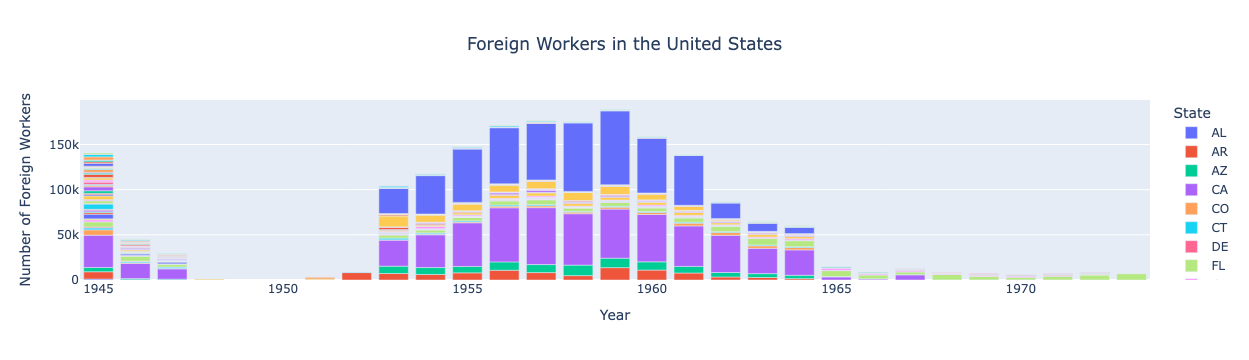

In [269]:
#filter out missing data
foreign = farmworkers_df[farmworkers_df['TotalForeign'].notna()]
foreign = foreign[foreign['TotalForeign'] > 0.0]

foreign = foreign.groupby(['State', 'Year'])['TotalForeign'].mean().reset_index()

foreignfig = px.bar(foreign, x='Year', y='TotalForeign', color='State', title='Foreign Workers in the United States',
                   labels={'TotalForeign': 'Number of Foreign Workers'})
foreignfig.update_layout(title={'x':0.5, 'xanchor': 'center'})

**4. What are some reasons this data may not accurately reflect foreign workers on farms in this time period?**

***So many potential responses here. First of all, not all states reporting at all times (basically nothing after 1964). Some of the values of foreign workers who weren't Bracero workers were negative, despite the fact that Braceros would automatically be foreign workers. (This was even the case in years other than the gap years noted by the data year range.) Also, likely does not account for unauthorized immigrants.***

#### Part 3: Domestic Worker Analysis

**1. Create a graph that shows the changes in the number of domestic workers over time.**

*NOTE: While most of this repeats previous code, keep in mind that there is no "Domestic" column. How will you account for all domestic workers?*

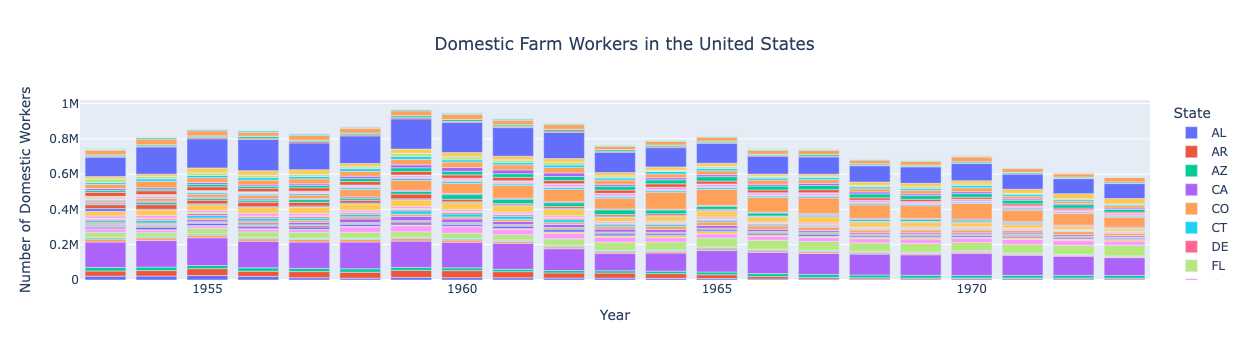

In [242]:
##Only use relevant date ranges
domestic_df = farmworkers_df[farmworkers_df['Year'] >= 1953]
domestic_df = domestic_df[domestic_df['Year'] <= 1973]

## In the data, there were 3 categories of workers that represented domestic labor: Local, Interstate, and Intrastate.
domestic_df = domestic_df.groupby(['State', 'Year'])[['Local', 'Interstate', 'Intrastate']].mean().reset_index()

##These three categories can be combined for the total domestic farmworkers
domestic_df['TotalDomestic'] = domestic_df['Local']+domestic_df['Interstate']+domestic_df['Intrastate']

domesticfig = px.bar(domestic_df, x='Year', y='TotalDomestic', color='State', title='Domestic Farm Workers in the United States',
                    labels={'TotalDomestic': 'Number of Domestic Workers'})
domesticfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
domesticfig.show()

**2. A key motivation for ending the Bracero Program was to benefit domestic workers. Based on this data, do you think ending the program succeeded in this goal? Explain why or why not.**
*Remember the Bracero Program ended in 1964*

***Like all of the open ended questions, this maninly relies on student interpretation and analysis, which could vary. However, answer should probably be that the program did not succeed in supporting domestic workers because their numbers did not really increase after the end of the program.***